## Chaotic Time-Series Datasets

This notebook includes five chaotic timeseries data based on the level of difficulty (first the easiest and last the hardest).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Quandratic Map

The quadratic map is an evolving dynamic conditioned on its previous timestep.

$$ x_{t+1} = c - x_{t}^{2} $$

where $c$ is a constant. The dynamic converges to steady state after certain iterations.

In [30]:
def quadratic_map(x_init, length=1, c=1.2):
    x = c - x_init**2
    qx = [x]
    for i in range(length):
        x = c - x**2
        qx.append(x)
    return np.array(qx)

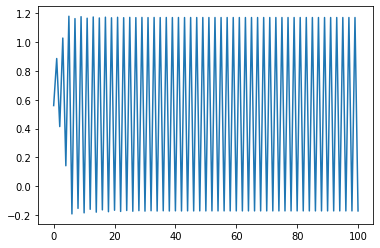

In [31]:
qx = quadratic_map(0.8, 100, c=1.2)
plt.plot(qx)

### 2. Mackey-Glass Dynamics
The Mackey-Glass equation is the nonlinear time delay differential equation

$$ \frac{d x}{d t}=\beta \frac{x_\tau}{1+x_\tau{ }^n}-\gamma x, \quad \gamma, \beta, n>0 $$


where $\beta$, $\gamma$, $\tau$ , $n$ are real numbers, and $x_{\tau}$ represents the value of the variable $x$ at time $(t−\tau)$. Depending on the values of the parameters, this equation displays a range of periodic and chaotic dynamics.

In [69]:
class GenData():
    # quadratic map
    length = 100
    c = 1.2
    x_init = 0.8

    # mackey glass
    beta = 0.2
    gamma = 0.1
    tau = 17
    n = 10

    def quadratic_map(x_init, length=1, c=1.2):
        x = c - x_init**2
        qx = [x]
        for i in range(length):
            x = c - x**2
            qx.append(x)
        return np.array(qx)
    
    def plot_xy(self):
        qx = self.quadratic_map(self.x_init, self.length, self.c)
        plt.plot(qx)
        plt.show()
    
    def mackey_glass(x_init=None, length=1, beta=0.2, gamma=0.1, tau=17, n=10):
        assert length > tau
        # add 100 warm up points to length
        length += 100
        mgx = []
        if x_init is not None:
            assert len(x_init) == tau+1
            mgx += x_init
        else:
            mgx += list(np.random.rand(tau+1,))
        for i in range(tau, length):
            # print(i, len(mgx))
            new_x = mgx[i] + beta * (mgx[i-tau]/(1 + mgx[i-tau]**n)) - gamma * mgx[i]
            mgx.append(new_x)
        return mgx[100:]

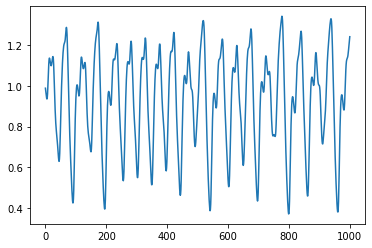

In [73]:
# mgx = mackey_glass(length=1000, x_init=[0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076, 1.1352, 1.1485,
#      1.1482, 1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756, 1.0739, 1.0759])
mgx = mackey_glass(length=1000, )
plt.plot(mgx)

### 3. Rossler Attractor

\begin{aligned}
\frac{dx}{dt} = - (y + z),\\[6pt]\frac{dy}{dt} = x + ay,\\[6pt]\frac{dz}{dt} = b + z(x-c).
\end{aligned}
where $a$, $b$ and $c$ are constant parameters.

In [98]:
class GenData():
    # quadratic map
    length = 100
    c = 1.2
    x_init = 0.8

    # mackey glass
    beta = 0.2
    gamma = 0.1
    tau = 17
    n = 10

    # rossler
    # length = 100000
    a = 0.13
    b = 0.2
    c = 6.5
    init_time = 0
    end_time = 32*np.pi

    def quadratic_map(x_init, length=1, c=1.2):
        x = c - x_init**2
        qx = [x]
        for i in range(length):
            x = c - x**2
            qx.append(x)
        return np.array(qx)
    
    def plot_xy(self):
        qx = self.quadratic_map(self.x_init, self.length, self.c)
        plt.plot(qx)
        plt.show()

    def plot_3d_projection(self, *xyz, lw=0.5):
        x, y, z = xyz
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot(x, y, z, lw= lw)
        plt.show()
    
    def mackey_glass(x_init=None, length=1, beta=0.2, gamma=0.1, tau=17, n=10):
        assert length > tau
        # add 100 warm up points to length
        length += 100
        mgx = []
        if x_init is not None:
            assert len(x_init) == tau+1
            mgx += x_init
        else:
            mgx += list(np.random.rand(tau+1,))
        for i in range(tau, length):
            # print(i, len(mgx))
            new_x = mgx[i] + beta * (mgx[i-tau]/(1 + mgx[i-tau]**n)) - gamma * mgx[i]
            mgx.append(new_x)
        return mgx[100:]
    
    def rossler(length=1, a=0.13, b=0.2, c=6.5, init_time=0, end_time=32*np.pi, init=None):
        time = np.linspace(init_time, end_time, length)
        step_size = (end_time - init_time) / length
        x, y, z = np.zeros((length,)), np.zeros((length,)), np.zeros((length,))
        if init is not None:
            x[0], y[0], z[0] = init
        for i in range(length-1):
            x[i+1] = x[i] + step_size * - (y[i] + z[i])
            y[i+1] = y[i] + step_size * (x[i] + a * y[i])
            z[i+1] = z[i] + step_size * (b + z[i] * (x[i] - c))
        return x, y, z

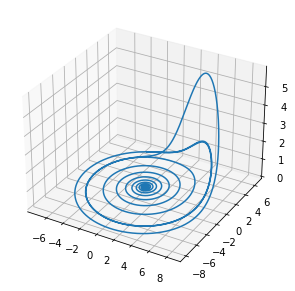

In [97]:
x, y, z = rossler(length=1000000, c=5)
plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.plot(x, y, z)

## 4. Lorenz Attractor

Lorenz model is a simplified mathematical model for __atmospheric convection__. The model is a system of three ordinary differential equations now known as the Lorenz equations:

\begin{aligned}
{\frac {\mathrm {d} x}{\mathrm {d} t}}&=\sigma (y-x),\\[6pt]{\frac {\mathrm {d} y}{\mathrm {d} t}}&=x(\rho -z)-y,\\[6pt]{\frac {\mathrm {d} z}{\mathrm {d} t}}&=xy-\beta z.
\end{aligned}

The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above. \
In particular, the equations describe the rate of change of three quantities with respect to time: **x is proportional to the rate of convection**, **y to the horizontal temperature variation**, and **z to the vertical temperature variation**.  \
The constants σ, ρ, and β are system parameters proportional to the __Prandtl number__, __Rayleigh number__, and __certain physical dimensions of the layer__ itself. Lorenz observed chaotic behavior for the value of parameters σ = 10, β = 8/3 and ρ = 28. We use the same values in this experiment.

In [108]:
class GenData():
    # quadratic map
    length = 100
    c = 1.2
    x_init = 0.8

    # mackey glass
    beta = 0.2
    gamma = 0.1
    tau = 17
    n = 10

    # rossler
    # length = 100000
    a = 0.13
    b = 0.2
    c = 6.5
    init_time = 0
    end_time = 32*np.pi

    # lorenz
    sigma = 10
    rho = 28
    beta = 2.667
    init = [0, 1, 1.05]
    # init_time = 0
    # end_time = 100

    def quadratic_map(x_init, length= 1, c= 1.2):
        x = c - x_init**2
        qx = [x]
        for i in range(length):
            x = c - x**2
            qx.append(x)
        return np.array(qx)
    
    def mackey_glass(x_init=None, length=1, beta=0.2, gamma=0.1, tau=17, n=10):
        assert length > tau
        # add 100 warm up points to length
        length += 100
        mgx = []
        if x_init is not None:
            assert len(x_init) == tau+1
            mgx += x_init
        else:
            mgx += list(np.random.rand(tau+1,))
        for i in range(tau, length):
            new_x = mgx[i] + beta * (mgx[i-tau]/(1 + mgx[i-tau]**n)) - gamma * mgx[i]
            mgx.append(new_x)
        return mgx[100:]
    
    def rossler(length=1, a=0.13, b=0.2, c=6.5, init_time=0, end_time=32*np.pi, init=None):
        time = np.linspace(init_time, end_time, length)
        step_size = (end_time - init_time) / length
        x, y, z = np.zeros((length,)), np.zeros((length,)), np.zeros((length,))
        if init is not None:
            x[0], y[0], z[0] = init
        for i in range(length-1):
            x[i+1] = x[i] + step_size * - (y[i] + z[i])
            y[i+1] = y[i] + step_size * (x[i] + a * y[i])
            z[i+1] = z[i] + step_size * (b + z[i] * (x[i] - c))
        return x, y, z

    def lorenz(length=1, sigma=10, rho=28, beta=2.667, init=[0, 1, 1.05], init_time=0, end_time=32*np.pi):
        time = np.linspace(init_time, end_time, length)
        step_size = (end_time - init_time) / length
        x, y, z = np.zeros((length,)), np.zeros((length,)), np.zeros((length,))
        if init is not None:
            x[0], y[0], z[0] = init
        for i in range(length-1):
            x[i+1] = x[i] + step_size * (sigma * (y[i] - x[i]))
            y[i+1] = y[i] + step_size * (x[i] * (rho - z[i]) - y[i])
            z[i+1] = z[i] + step_size * (x[i]*y[i] - beta*z[i])
        return x, y, z

def plot_3d_projection(*xyz, lw=0.5):
    x, y, z = xyz
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x, y, z, lw= lw)
    plt.show()

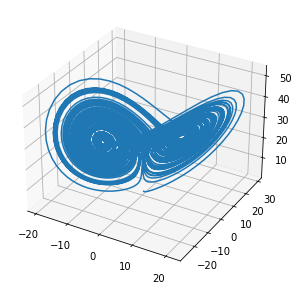

In [109]:
x, y, z = lorenz(length=10000)
plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.plot(x, y, z)

## 5. Navier-Stokes equation for 2D cavity flow


The Navier-Stokes equations used consists of three main equations:

    - Velocity in component $u$
    - Velocity in component $v$
    - Pressure via pressure-Poission equation

<!-- We also included a source of pressure ($F$) in $u$ to mimic the effect of a preassure-driven channel flow. -->

\begin{gathered}
\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}+v \frac{\partial u}{\partial y}=-\frac{1}{\rho} \frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)+F \\
\frac{\partial v}{\partial t}+u \frac{\partial v}{\partial x}+v \frac{\partial v}{\partial y}=-\frac{1}{\rho} \frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) \\
\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x} \frac{\partial u}{\partial x}+2 \frac{\partial u}{\partial y} \frac{\partial v}{\partial x}+\frac{\partial v}{\partial y} \frac{\partial v}{\partial y}\right)
\end{gathered}

$\nu$ represents the velocity field.

In [15]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    # The math within the bracket in pressure Poisson
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    return b

def pressure_poisson(p, dx, dy, b, nit=100):
    pn = np.empty_like(p)
    pn = p.copy()
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])
        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
    return p

def cavity_flow(length, u, v, dt, dx, dy, p, rho, nu, nit, u_field, v_field, p_field, b_field):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros_like(b_field[0])
    for n in range(length):
        un = u.copy()
        vn = v.copy()
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        # over-ride b with random noise
        b = np.random.randn(*b.shape) * 3
        p = pressure_poisson(p, dx, dy, b, nit=nit)
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        # Store
        u_field[n] = u
        v_field[n] = v
        p_field[n] = p
        b_field[n] = b
    return u, v, p, b

def navier_stokes_u(size=[40, 40], length=1, x_range=[0, 2], y_range=[0, 2], init_time=0, end_time=32*np.pi, nit=50, rho=1, nu=0.1):
    # Adjust and define configs
    size = [dim+1 for dim in size]
    step_size = (end_time - init_time) / length
    dx = (x_range[1] - x_range[0]) / (size[0] - 1)
    dy = (y_range[1] - y_range[0]) / (size[1] - 1)
    print(step_size)
    X, Y = np.linspace(x_range[0], x_range[1], size[0]), np.linspace(y_range[0], y_range[1], size[1])
    X, Y = np.meshgrid(X, Y)
    # Pre-allocate variables
    u_field = np.zeros([length,]+size)
    v_field = np.zeros([length,]+size)
    p_field = np.zeros([length,]+size)
    b_field = np.zeros([length,]+size)
    u, v, p, b = cavity_flow(length, u_field[0], v_field[0], step_size, dx, dy, p_field[0], rho, nu, nit, u_field, v_field, p_field, b_field)
    return u_field, v_field, p_field, b_field

0.0015707963267948967


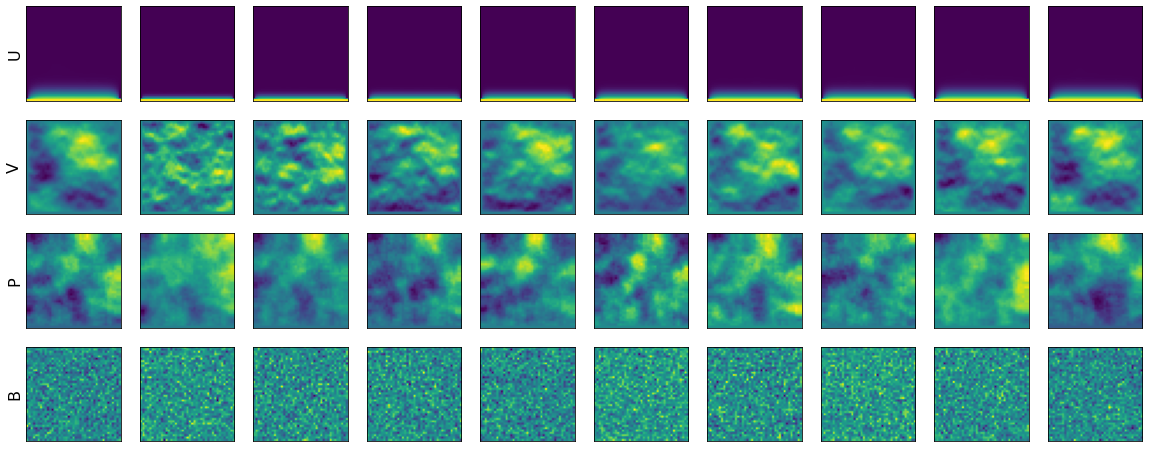

In [16]:
uf, vf, pf, bf = navier_stokes_u(length=100, end_time=np.pi/20)

plt.figure(figsize=(20, 8))
cnt = 1
for i in range(0, len(uf), len(uf)//10):
    plt.subplot(4, 10, cnt)
    plt.imshow(uf[i])
    plt.xticks([])
    plt.yticks([])
    if cnt == 1:
        plt.ylabel("U", fontsize=16)
    cnt += 1
    
cnt = 1 + 10
for i in range(0, len(vf), len(vf)//10):
    plt.subplot(4, 10, cnt)
    plt.imshow(vf[i])
    plt.xticks([])
    plt.yticks([])
    if cnt == 11:
        plt.ylabel("V", fontsize=16)
    cnt += 1
    
cnt = 1 + 20
for i in range(0, len(pf), len(pf)//10):
    plt.subplot(4, 10, cnt)
    plt.imshow(pf[i] + pf[0])
    plt.xticks([])
    plt.yticks([])
    if cnt == 21:
        plt.ylabel("P", fontsize=16)
    cnt += 1

cnt = 1 + 30
for i in range(0, len(bf), len(bf)//10):
    plt.subplot(4, 10, cnt)
    plt.imshow(bf[i])
    plt.xticks([])
    plt.yticks([])
    if cnt == 31:
        plt.ylabel("B", fontsize=16)
    cnt += 1

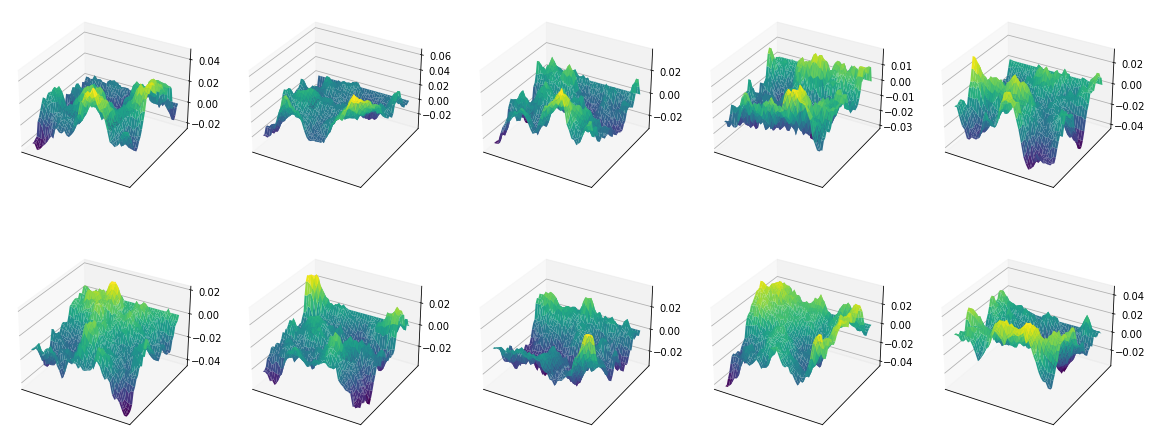

In [17]:
X, Y = np.meshgrid(np.linspace(0, 2, 41), np.linspace(0, 2, 41))

fig = plt.figure(figsize=(20, 8))

cnt = 1
for i in range(0, len(pf), len(pf)//10):
    ax = plt.subplot(2, 5, cnt, projection='3d')
    surf = ax.plot_surface(X, Y, pf[i], cmap="viridis")
    plt.xticks([])
    plt.yticks([])
    # plt.zticks([])
    cnt += 1